In [1]:
import os
import pathlib
import sys

import pandas as pd

pd.options.mode.copy_on_write = True
pd.options.display.max_columns = None

from transit import vmgo

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
data_path = pathlib.Path(os.path.abspath("../data"))
data_path

PosixPath('/home/jnban/projects/roanoke-transit/data')

In [3]:
plot_path = pathlib.Path(os.path.abspath("../plots"))
plot_path

PosixPath('/home/jnban/projects/roanoke-transit/plots')

In [4]:
output_path = pathlib.Path(os.path.abspath("../output"))
output_path

PosixPath('/home/jnban/projects/roanoke-transit/output')

In [5]:
df_alighting = pd.read_csv(
    str(data_path / 'Alighting-May24-Apr25.csv'),
    header=[2],
    low_memory=False,
    skip_blank_lines=True,
)
df_alighting

Stop Name Sum of Passenger Alightings
0             10th at Staunton (no number)                      906.00
1         10th NB at Courtland (no number)                      229.00
2        10th NB at Greenhurst (no number)                      584.00
3         10th SB at Courtland (no number)                      158.00
4        10th SB at Greenhurst (no number)                      108.00
..                                     ...                         ...
816            Wise EB at 18th (no number)                      301.00
817  Wise EB at Indian Village (no number)                    1,812.00
818            Wise WB at 16th (no number)                       65.00
819            Wise WB at 18th (no number)                      217.00
820  Wise WB at Indian Village (no number)                      152.00

[821 rows x 2 columns]

In [6]:
df_boarding = pd.read_csv(
    str(data_path / 'Boarding-May24-Apr25.csv'),
    header=[2],
    low_memory=False,
    skip_blank_lines=True,
)
df_boarding

Stop Name Sum of Passenger Boardings
0             10th at Staunton (no number)                     443.00
1         10th NB at Courtland (no number)                      62.00
2        10th NB at Greenhurst (no number)                     102.00
3         10th SB at Courtland (no number)                     374.00
4        10th SB at Greenhurst (no number)                     619.00
..                                     ...                        ...
816            Wise EB at 18th (no number)                     459.00
817  Wise EB at Indian Village (no number)                     220.00
818            Wise WB at 16th (no number)                     846.00
819            Wise WB at 18th (no number)                     240.00
820  Wise WB at Indian Village (no number)                   2,336.00

[821 rows x 2 columns]

In [7]:
df_ridership = (
    df_alighting.set_index('Stop Name')
    .join(
        df_boarding.set_index('Stop Name'),
        on='Stop Name',
        how='outer'
    )
    .reset_index()
)
df_ridership['Stop Name'] = df_ridership['Stop Name'].str.replace(' (no number)', '')
df_ridership

Stop Name Sum of Passenger Alightings  \
0         10th NB at Courtland                      229.00   
1        10th NB at Greenhurst                      584.00   
2         10th SB at Courtland                      158.00   
3        10th SB at Greenhurst                      108.00   
4           10th SB at Hanover                       49.00   
..                         ...                         ...   
816            Wise EB at 18th                      301.00   
817  Wise EB at Indian Village                    1,812.00   
818            Wise WB at 16th                       65.00   
819            Wise WB at 18th                      217.00   
820  Wise WB at Indian Village                      152.00   

    Sum of Passenger Boardings  
0                        62.00  
1                       102.00  
2                       374.00  
3                       619.00  
4                        64.00  
..                         ...  
816                     459.00  
817                     220.00  
818                     846.00  
819                     240.00  
820                   2,336.00  

[821 rows x 3 columns]

In [8]:
regions = vmgo.load_from_datadir(data_path / 'vmgo')
regions

{0: <transit.vmgo.Region at 0x7fe36b53e3c0>}

In [9]:
# create dataframe rows
rows = []

for region in regions.values():
    for route in region.routes:
        for directions in route.directions:
            for stop in directions.stops:
                rows.append({
                    "region": region.name,
                    "route": route.name,
                    "direction": directions.name,
                    "stop": stop.name,
                    "lat": stop.lat,
                    "lon": stop.lon,
                })
df_routes = pd.DataFrame(rows)
df_routes

region                                   route  \
0     No Region  11- 3rd St Station to Valley View Mall   
1     No Region  11- 3rd St Station to Valley View Mall   
2     No Region  11- 3rd St Station to Valley View Mall   
3     No Region  11- 3rd St Station to Valley View Mall   
4     No Region  11- 3rd St Station to Valley View Mall   
...         ...                                     ...   
996   No Region                      Star Line Trolley    
997   No Region                      Star Line Trolley    
998   No Region                      Star Line Trolley    
999   No Region                      Star Line Trolley    
1000  No Region                      Star Line Trolley    

                             direction                              stop  \
0     11-Third Street Valley View Mall             3rd St Station Slip Q   
1     11-Third Street Valley View Mall            Salem Avenue WB at 5th   
2     11-Third Street Valley View Mall              5th St at Gilmer Ave   
3     11-Third Street Valley View Mall                5th St at Harrison   
4     11-Third Street Valley View Mall                   McDowell at 5th   
...                                ...                               ...   
996               Star Line Trolley                   Jefferson & Walnut   
997               Star Line Trolley         Radford University Carilion    
998               Star Line Trolley     Jefferson & Bullitt (Northbound)   
999               Star Line Trolley                     Jefferson & Luck   
1000              Star Line Trolley                      Church & Market   

            lat        lon  
0     37.272643 -79.946005  
1     37.272404 -79.949678  
2     37.276955 -79.948074  
3     37.279345 -79.946998  
4     37.281332 -79.946445  
...         ...        ...  
996   37.260543 -79.941436  
997   37.265781 -79.940977  
998   37.268357 -79.940632  
999   37.269959 -79.940551  
1000  37.270458 -79.939109  

[1001 rows x 6 columns]

In [61]:
df = df_routes.groupby(['stop']).count()
df['route_count'] = df['direction']
df = df.reset_index()[['stop', 'route_count']]
df_stop_route_count = df
df_stop_route_count

stop  route_count
0         10th NB at Courtland            1
1        10th NB at Greenhurst            1
2         10th SB at Courtland            1
3        10th SB at Greenhurst            1
4           10th SB at Hanover            1
..                         ...          ...
807            Wise EB at 18th            1
808  Wise EB at Indian Village            1
809            Wise WB at 16th            1
810            Wise WB at 18th            1
811  Wise WB at Indian Village            1

[812 rows x 2 columns]

In [62]:
df = df_routes.merge(
    df_ridership.rename(
        columns={
            "Stop Name": "stop",
            "Sum of Passenger Alightings": "alightings",
            "Sum of Passenger Boardings": "boardings",
        }
    ),
    on='stop',
    how='left',
).merge(
    df_stop_route_count,
    on='stop',
    how='left',
)
df['alightings'] = df['alightings'].str.replace(',', '').astype(float)
df['boardings'] = df['boardings'].str.replace(',', '').astype(float)
df = df.fillna(0)
df_route_ridership = df
df_route_ridership

region                                   route  \
0     No Region  11- 3rd St Station to Valley View Mall   
1     No Region  11- 3rd St Station to Valley View Mall   
2     No Region  11- 3rd St Station to Valley View Mall   
3     No Region  11- 3rd St Station to Valley View Mall   
4     No Region  11- 3rd St Station to Valley View Mall   
...         ...                                     ...   
996   No Region                      Star Line Trolley    
997   No Region                      Star Line Trolley    
998   No Region                      Star Line Trolley    
999   No Region                      Star Line Trolley    
1000  No Region                      Star Line Trolley    

                             direction                              stop  \
0     11-Third Street Valley View Mall             3rd St Station Slip Q   
1     11-Third Street Valley View Mall            Salem Avenue WB at 5th   
2     11-Third Street Valley View Mall              5th St at Gilmer Ave   
3     11-Third Street Valley View Mall                5th St at Harrison   
4     11-Third Street Valley View Mall                   McDowell at 5th   
...                                ...                               ...   
996               Star Line Trolley                   Jefferson & Walnut   
997               Star Line Trolley         Radford University Carilion    
998               Star Line Trolley     Jefferson & Bullitt (Northbound)   
999               Star Line Trolley                     Jefferson & Luck   
1000              Star Line Trolley                      Church & Market   

            lat        lon  alightings  boardings  route_count  
0     37.272643 -79.946005     33225.0    39040.0            2  
1     37.272404 -79.949678       192.0      683.0            3  
2     37.276955 -79.948074       445.0      875.0            2  
3     37.279345 -79.946998      1470.0      744.0            1  
4     37.281332 -79.946445       829.0      628.0            2  
...         ...        ...         ...        ...          ...  
996   37.260543 -79.941436         0.0        0.0            4  
997   37.265781 -79.940977         0.0        0.0            2  
998   37.268357 -79.940632         0.0        0.0            2  
999   37.269959 -79.940551         0.0        0.0            3  
1000  37.270458 -79.939109         0.0        0.0            2  

[1001 rows x 9 columns]

In [17]:
df_route_ridership.sort_values('boardings', ascending=False).to_csv(
    output_path / 'ridership' / 'ridership-with-stops-sorted-boarding.csv')
df_route_ridership.sort_values('alightings', ascending=False).to_csv(
    output_path / 'ridership' / 'ridership-with-stops-sorted-alighting.csv')

In [23]:
df_stop_lat_lons = df_route_ridership[['stop', 'lat', 'lon']].drop_duplicates()
df_stop_lat_lons

stop        lat        lon
0               3rd St Station Slip Q  37.272643 -79.946005
1              Salem Avenue WB at 5th  37.272404 -79.949678
2                5th St at Gilmer Ave  37.276955 -79.948074
3                  5th St at Harrison  37.279345 -79.946998
4                     McDowell at 5th  37.281332 -79.946445
..                                ...        ...        ...
979                Jefferson & Walnut  37.260543 -79.941436
980      Radford University Carilion   37.265781 -79.940977
981  Jefferson & Bullitt (Northbound)  37.268357 -79.940632
983                   Church & Market  37.270458 -79.939109
995                               VTC  37.257165 -79.943021

[832 rows x 3 columns]

In [26]:
df = df_stop_lat_lons.merge(
    df_ridership.rename(
        columns={
            "Stop Name": "stop",
            "Sum of Passenger Alightings": "alightings",
            "Sum of Passenger Boardings": "boardings",
        }
    ),
    on='stop',
    how='left',
)
df['alightings'] = df['alightings'].str.replace(',', '').astype(float)
df['boardings'] = df['boardings'].str.replace(',', '').astype(float)
#df = df.fillna(0)
df_stop_ridership = df
df_stop_ridership

stop        lat        lon  alightings  \
0               3rd St Station Slip Q  37.272643 -79.946005     33225.0   
1              Salem Avenue WB at 5th  37.272404 -79.949678       192.0   
2                5th St at Gilmer Ave  37.276955 -79.948074       445.0   
3                  5th St at Harrison  37.279345 -79.946998      1470.0   
4                     McDowell at 5th  37.281332 -79.946445       829.0   
..                                ...        ...        ...         ...   
827                Jefferson & Walnut  37.260543 -79.941436         NaN   
828      Radford University Carilion   37.265781 -79.940977         NaN   
829  Jefferson & Bullitt (Northbound)  37.268357 -79.940632         NaN   
830                   Church & Market  37.270458 -79.939109         NaN   
831                               VTC  37.257165 -79.943021      8481.0   

     boardings  
0      39040.0  
1        683.0  
2        875.0  
3        744.0  
4        628.0  
..         ...  
827        NaN  
828        NaN  
829        NaN  
830        NaN  
831     8314.0  

[832 rows x 5 columns]

In [72]:
import ipyleaflet.basemaps
import ipywidgets

pymap = ipyleaflet.Map(
    center=(df_routes['lat'].mean(), df_routes['lon'].mean()), zoom=12, min_zoom=1, max_zoom=20,
    layout=ipywidgets.Layout(width='auto', height='800px')
)

markers = []
for index, row in df_stop_ridership.sort_values('alightings', ascending=False)[:40].iterrows():
    html = ''.join([
        '<span style="color:#000; font-size:8pt;">',
        row['stop'],
        '<br/>',
        f"{int(row['boardings'])} boarded / {int(row['alightings'])} alighted",
        '</span',
    ])
    icon = ipyleaflet.DivIcon(html=html, bg_pos=[0, 0], icon_size=[100, 70])
    marker = ipyleaflet.Marker(
        location=(row['lat'], row['lon']),
        title=row['stop'],
        icon=icon,
        draggable=False,
    )
    markers.append(marker)

marker_cluster = ipyleaflet.MarkerCluster(markers=markers)
pymap.add(marker_cluster)
pymap.save(output_path / 'ridership' / 'map-top-40-alightings.html', title='Top 40 Stops by Alighting Numbers')
pymap

Map(center=[np.float64(37.276543736454485), np.float64(-79.9713701920397)], controls=(ZoomControl(options=['po…

In [51]:
import matplotlib.pyplot as plt
import shutil

In [52]:
routes_and_directions = df_route_ridership[['route', 'direction']].drop_duplicates()

In [68]:
plot_dir = plot_path / 'ridership-full-adjusted'
shutil.rmtree(plot_dir, ignore_errors=True)
plot_dir.mkdir(exist_ok=True)

for index, row in routes_and_directions.iterrows():
    df = df_route_ridership
    df = df[(df['route'] == row['route']) & (df['direction'] == row['direction'])]

    fig, ax = plt.subplots(layout='constrained')
    fig.set_size_inches(12, 8)

    ax.set_title('\n'.join([
        'Roanoke, VA Boarding/Alighting: May 1, 2024 - April 30, 2025',
        row['route'],
        row['direction'],
        '(with total ridership of shared stops divided by number of shared routes)',
    ]))
        
    ax.bar(df['stop'], df['boardings'] / df['route_count'], color='blue', label='boardings')
    ax.bar(df['stop'], -df['alightings'] / df['route_count'], color='red', label='alightings')
    ax.legend(loc="best")

    ax.tick_params(axis='x', labelrotation=90)

    # plt.show()
    plt.savefig(plot_dir / f'{row["route"].strip().replace('/', ' or ')} --- {row["direction"].strip().replace('/', ' or ')}.png')
    plt.close()

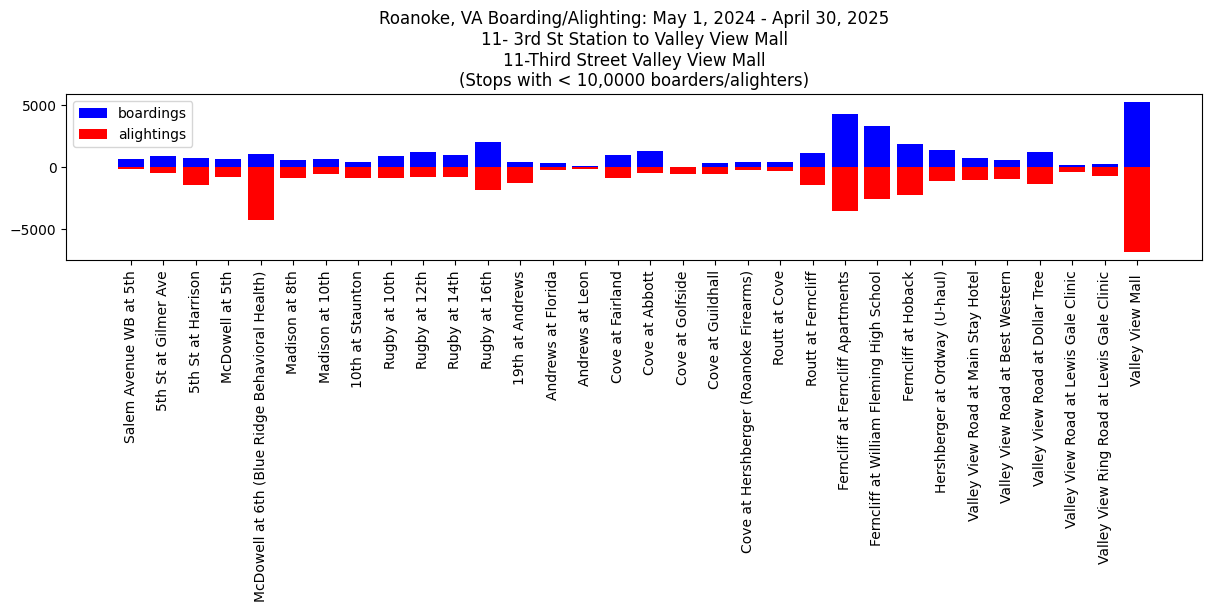

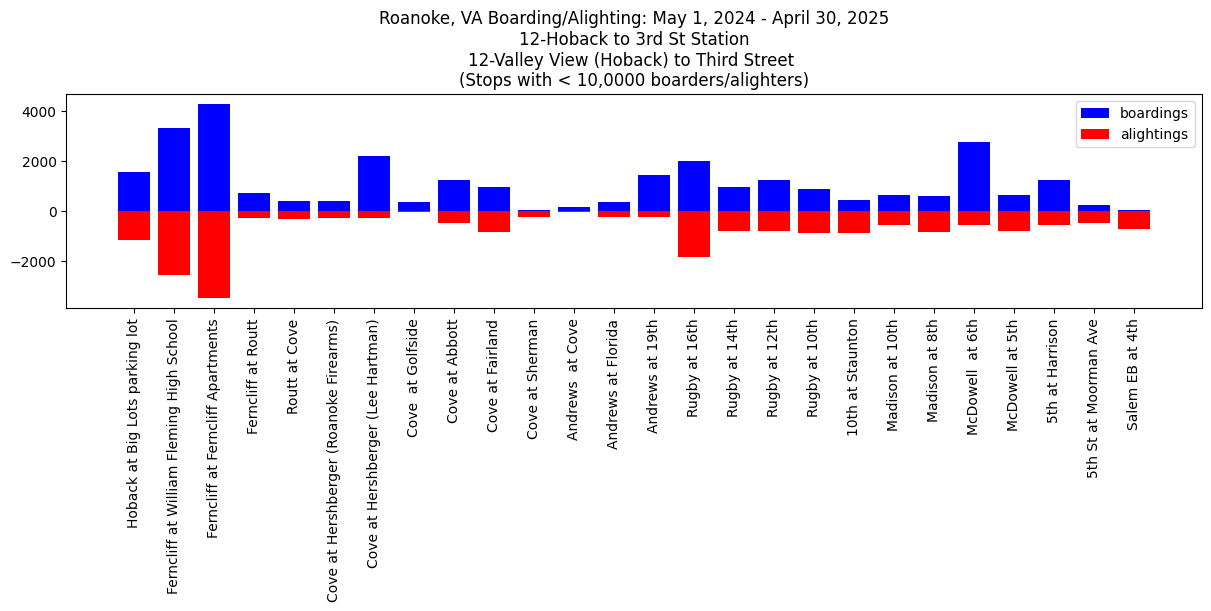

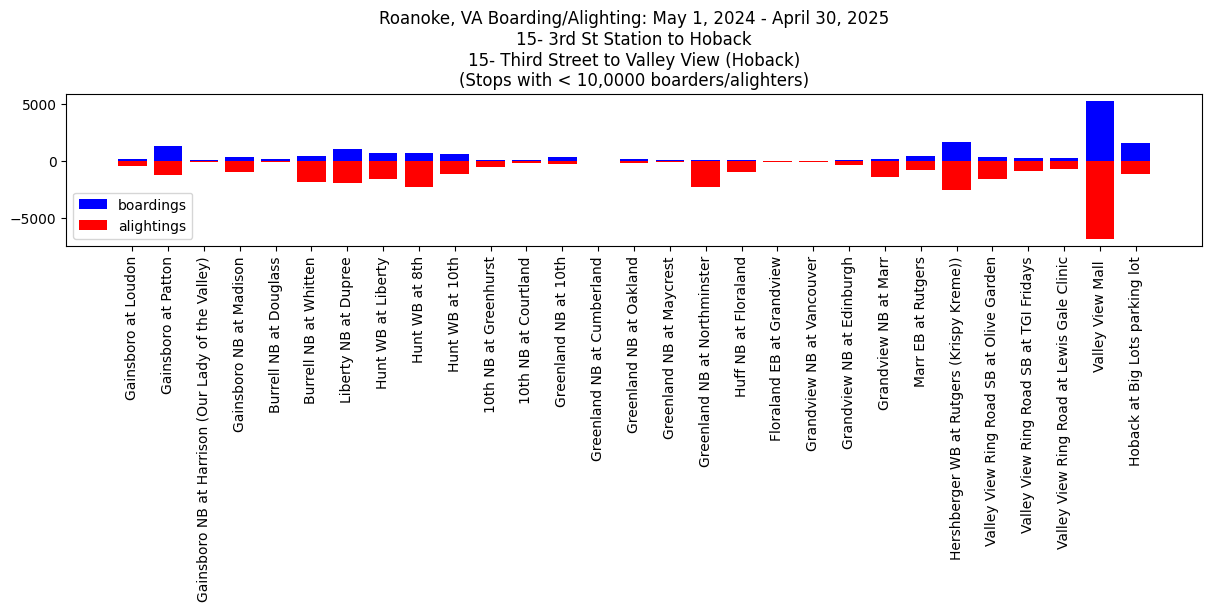

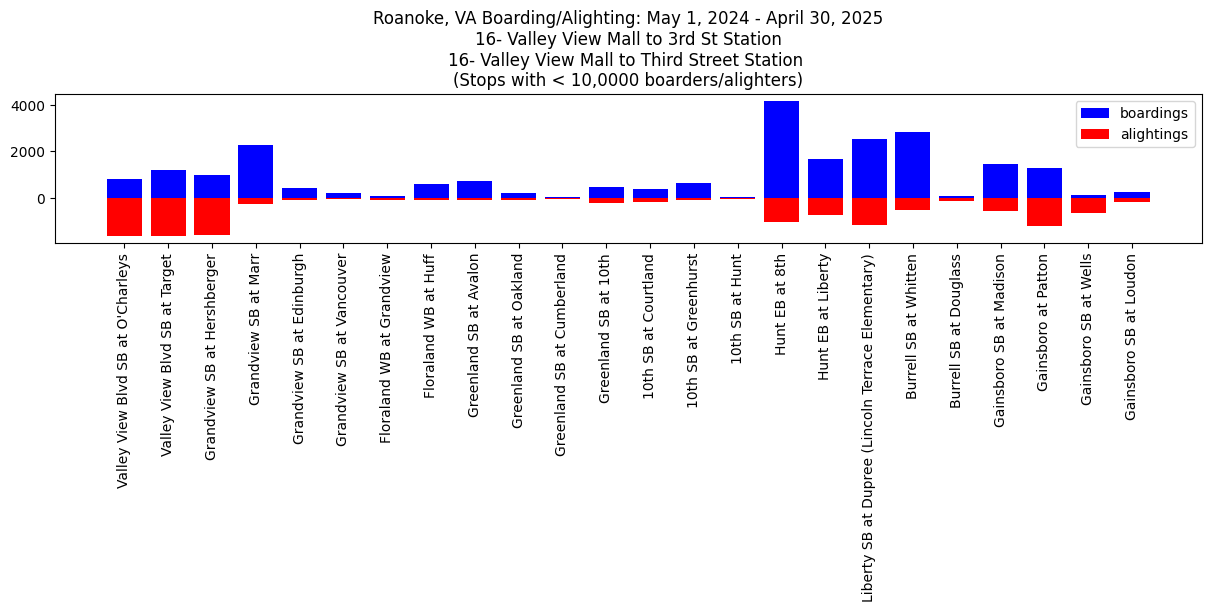

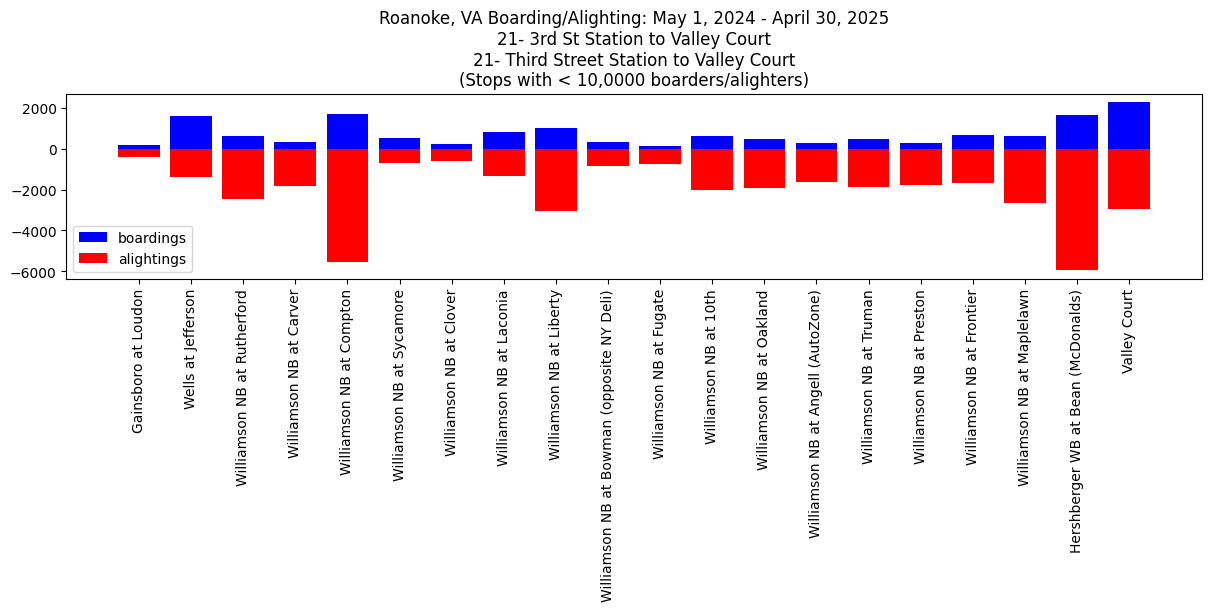

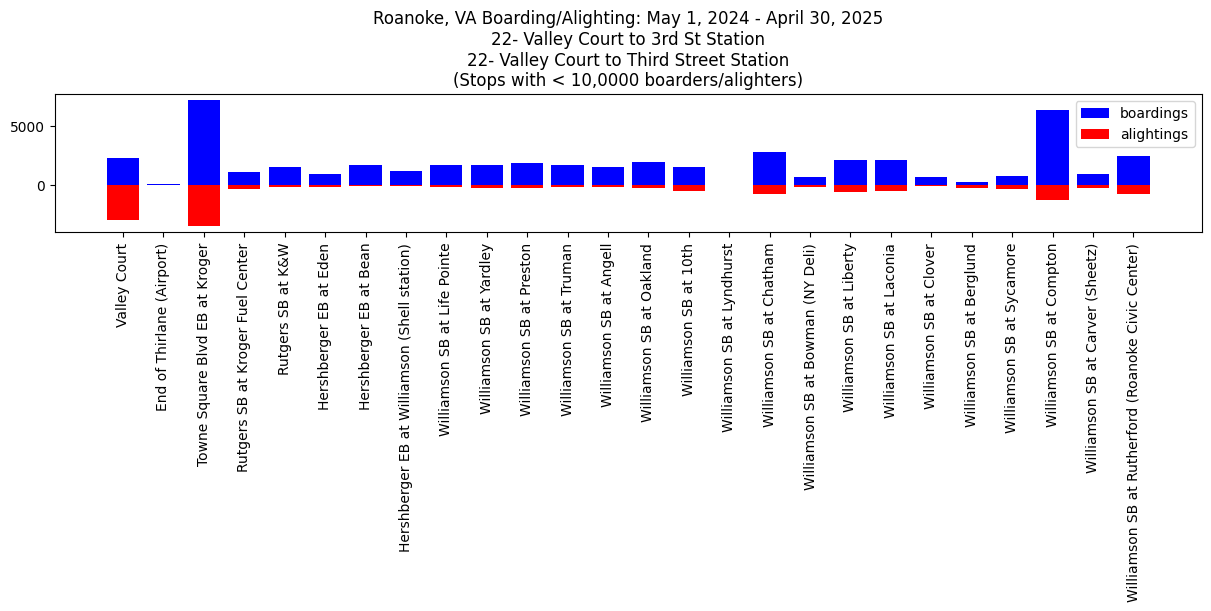

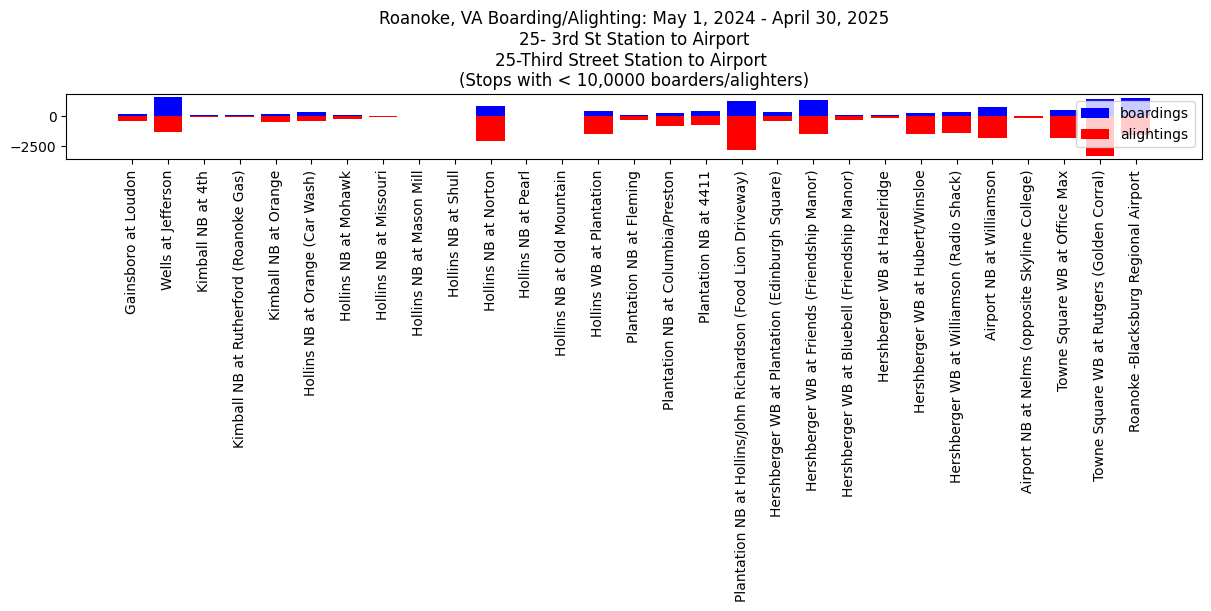

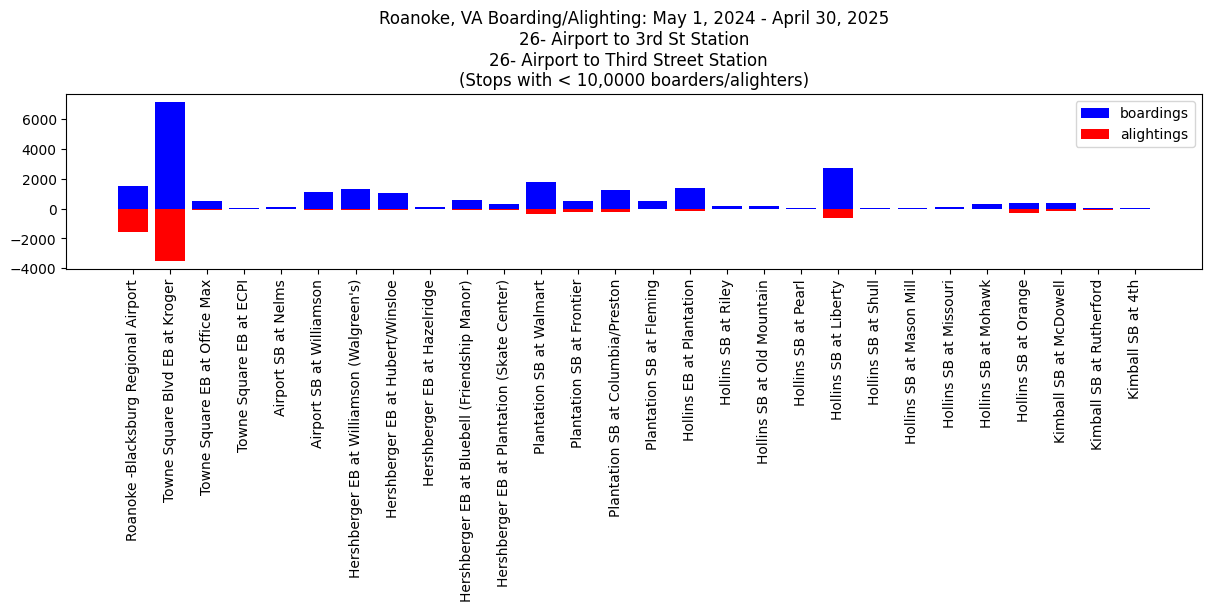

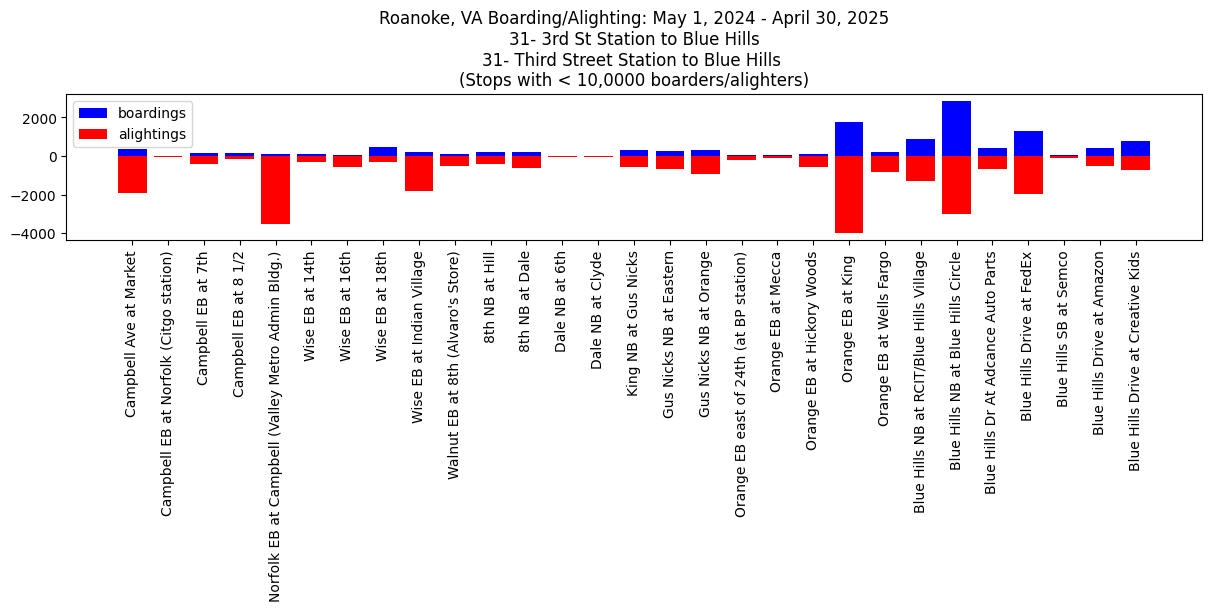

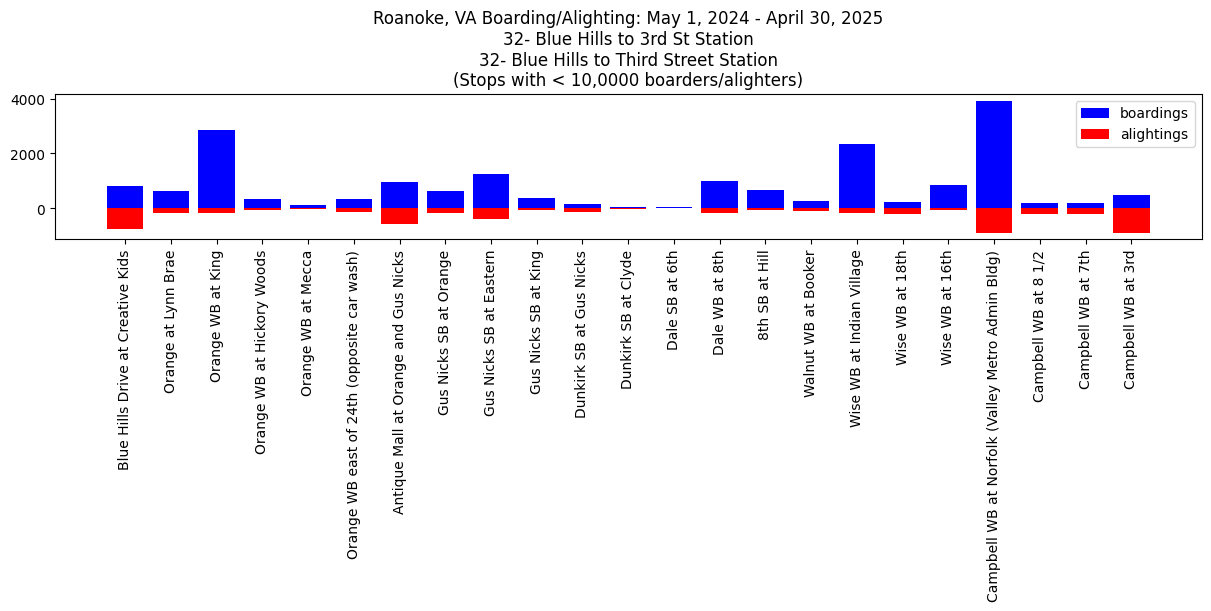

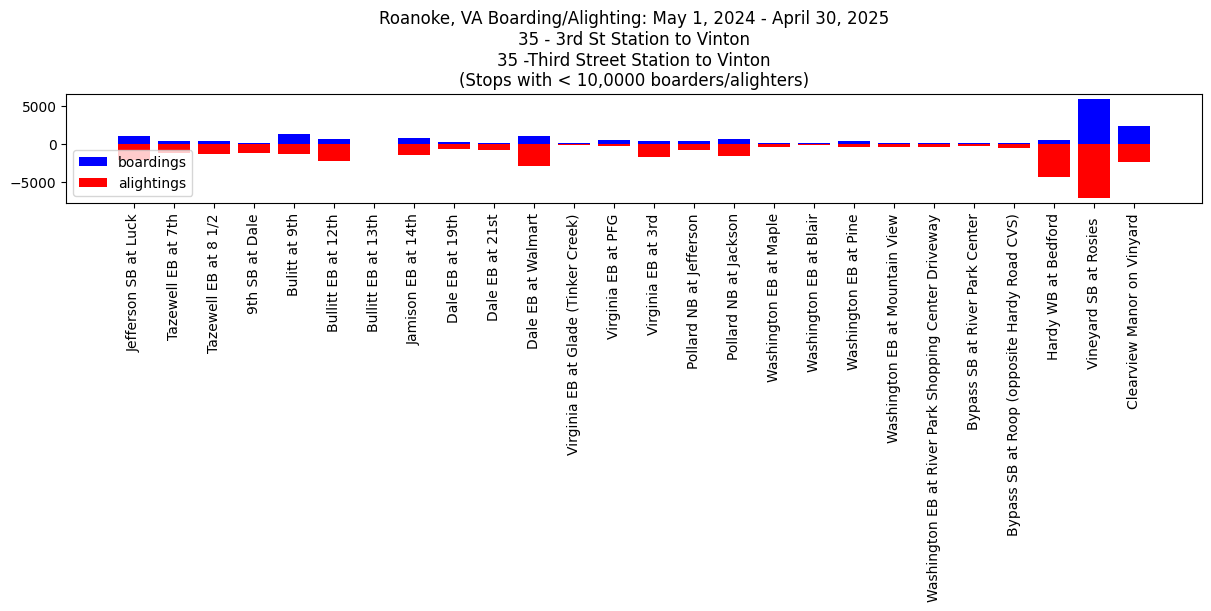

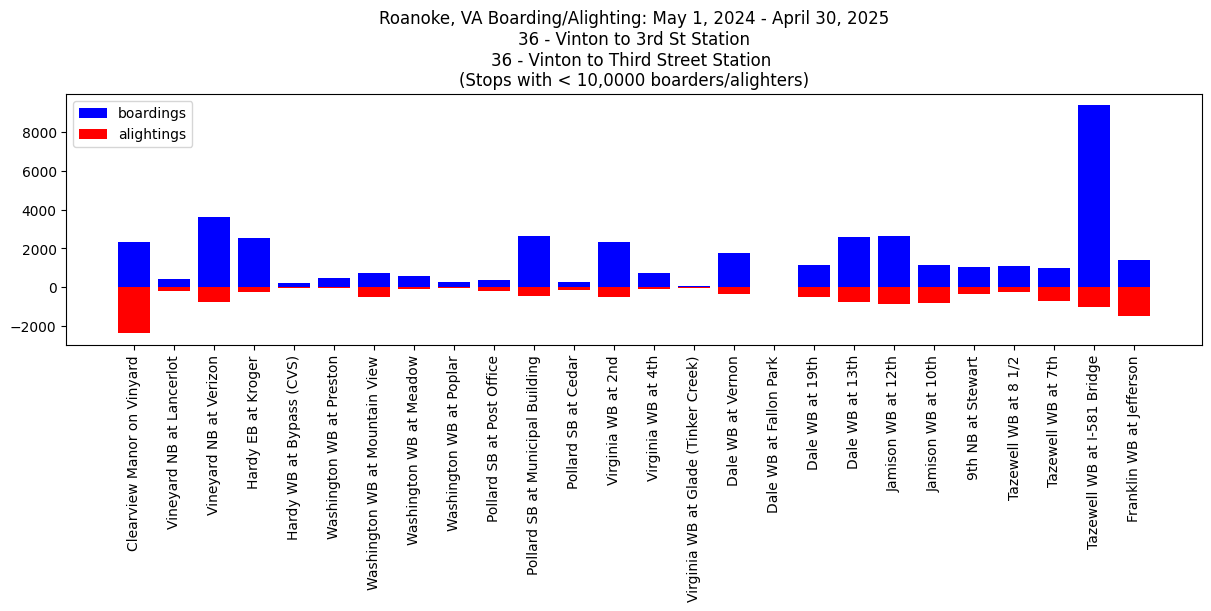

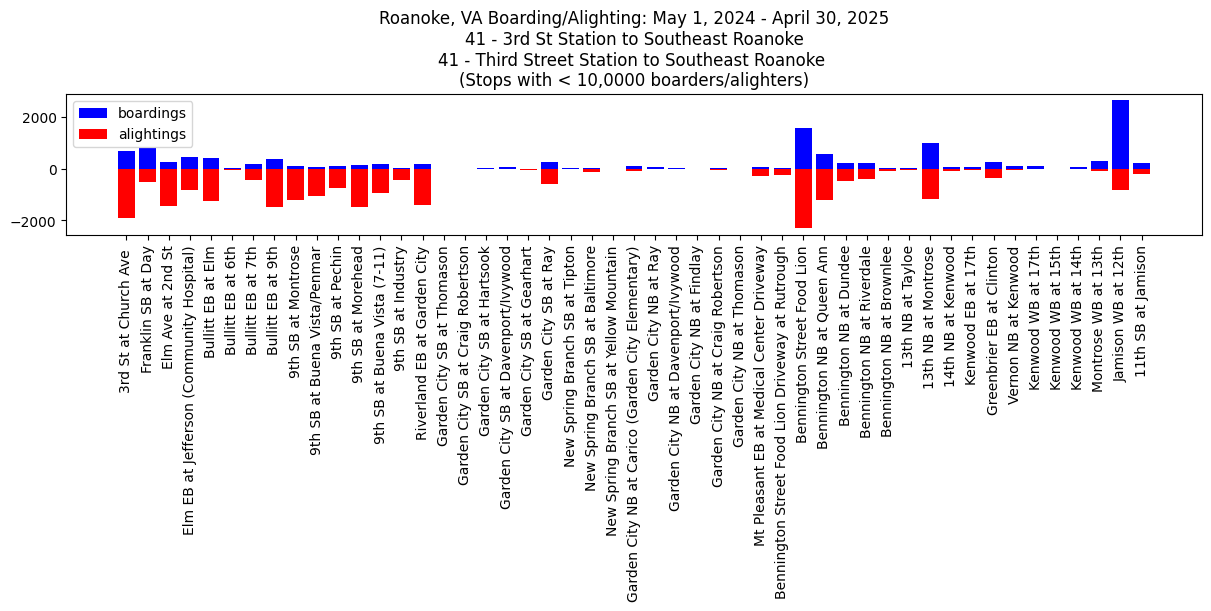

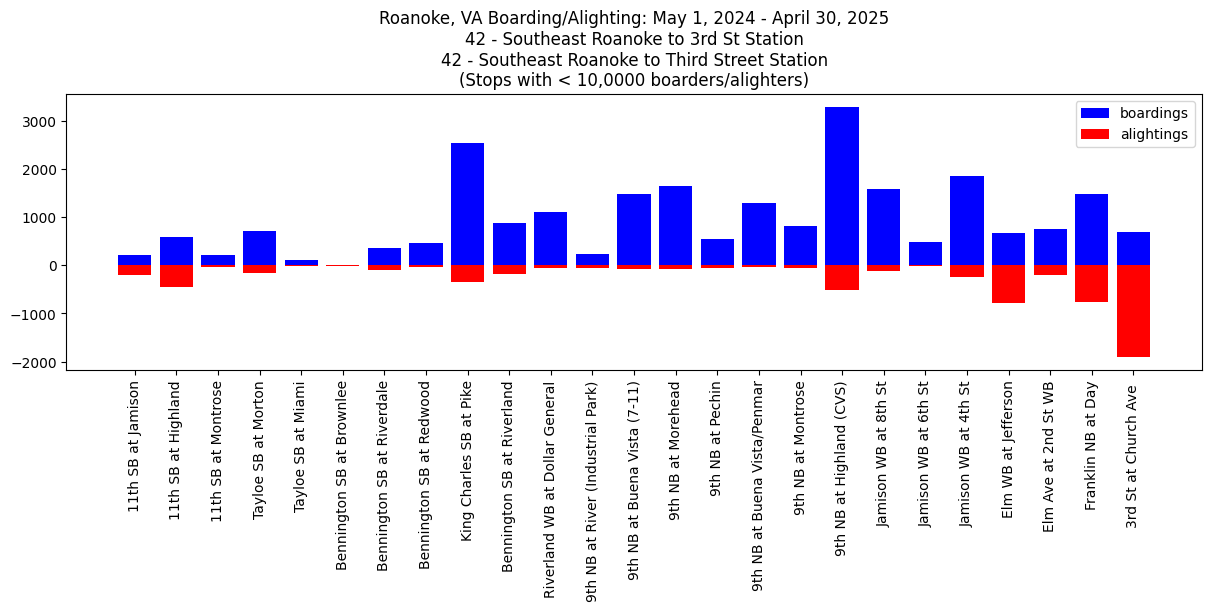

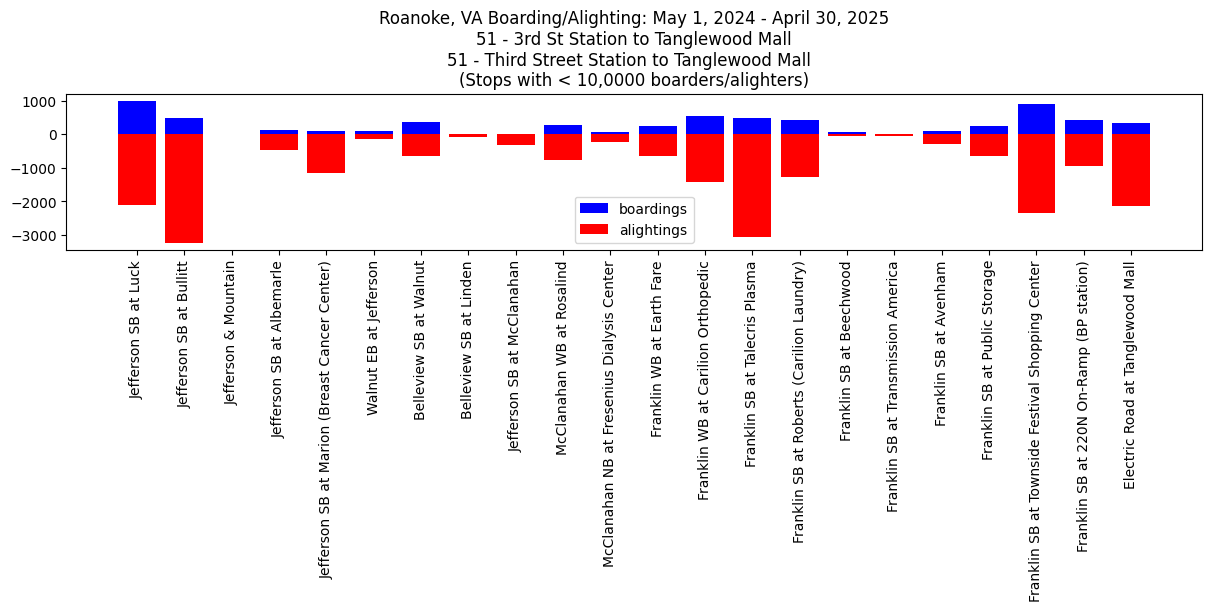

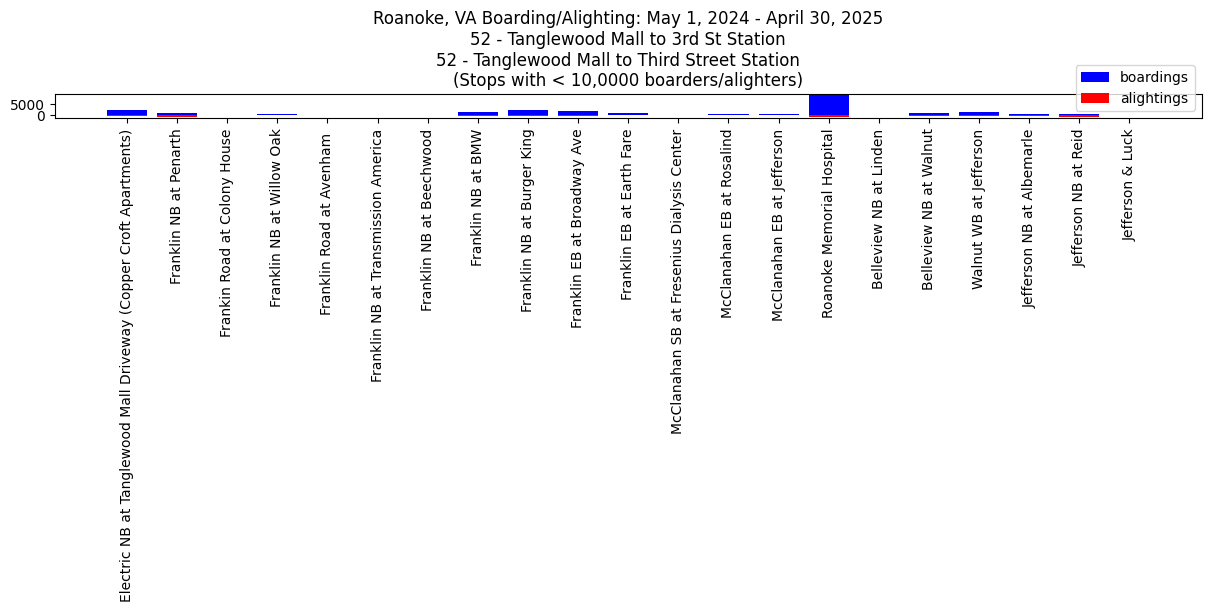

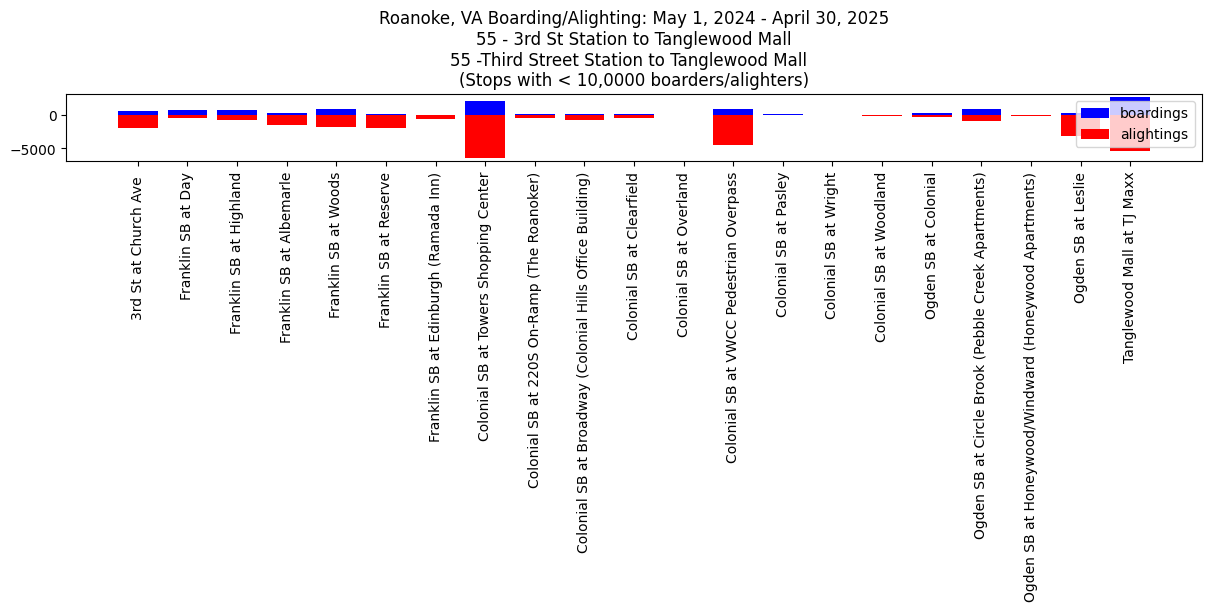

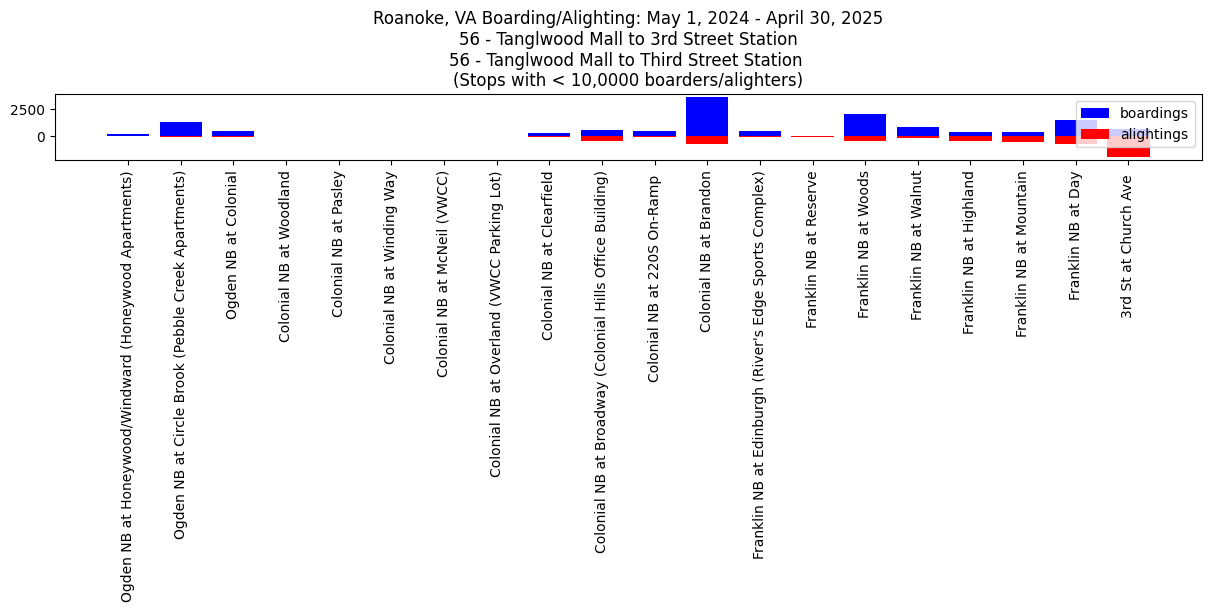

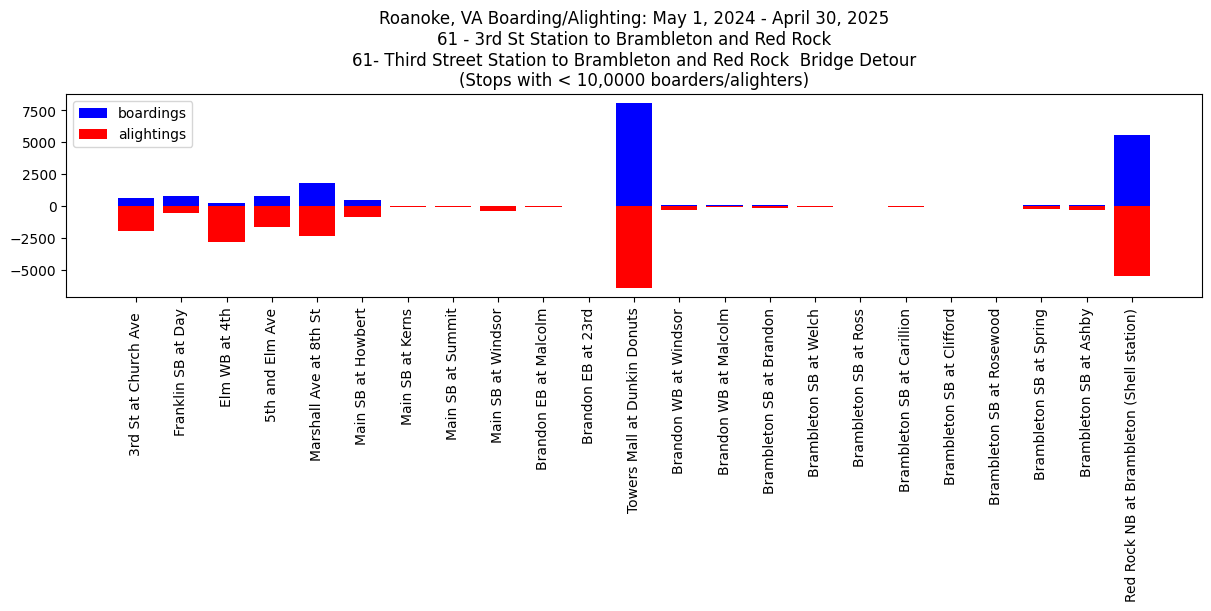

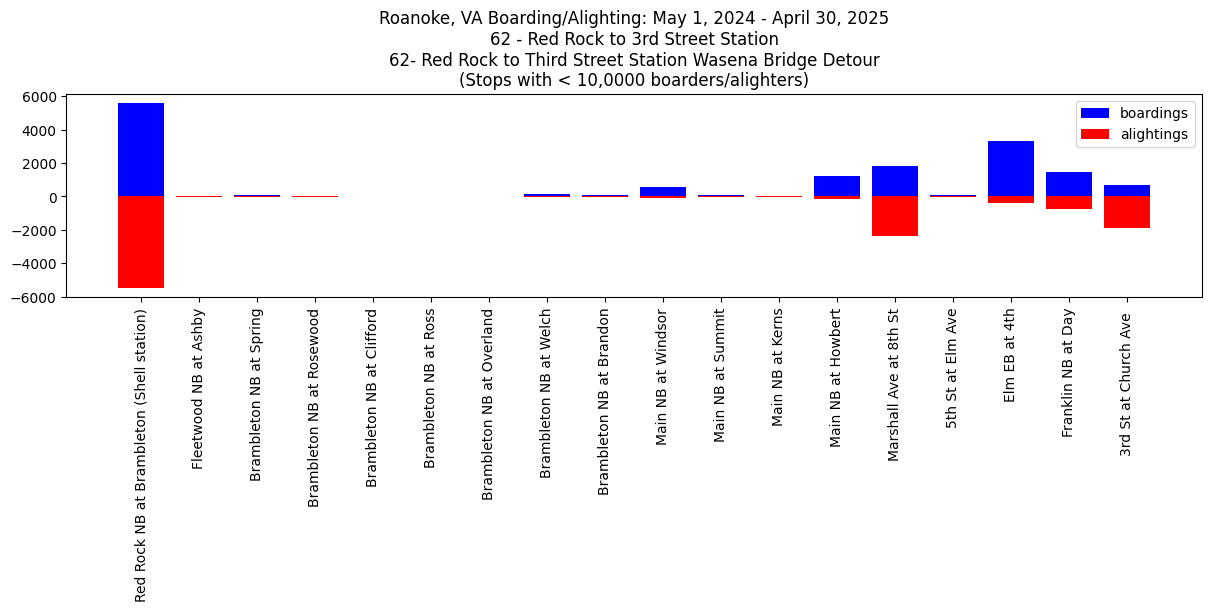

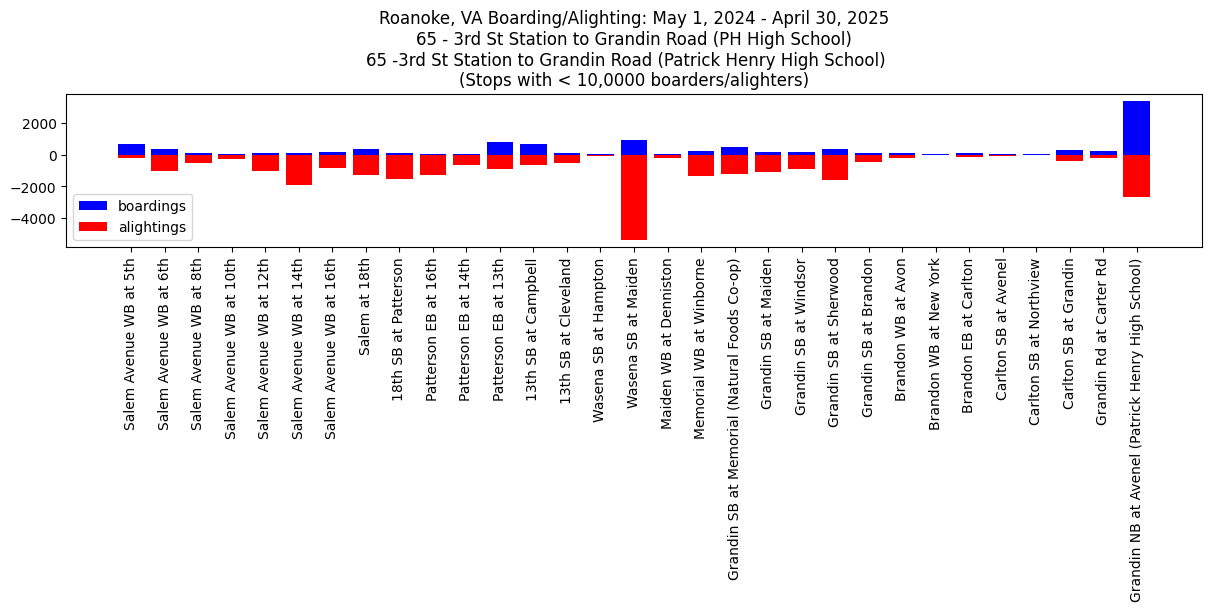

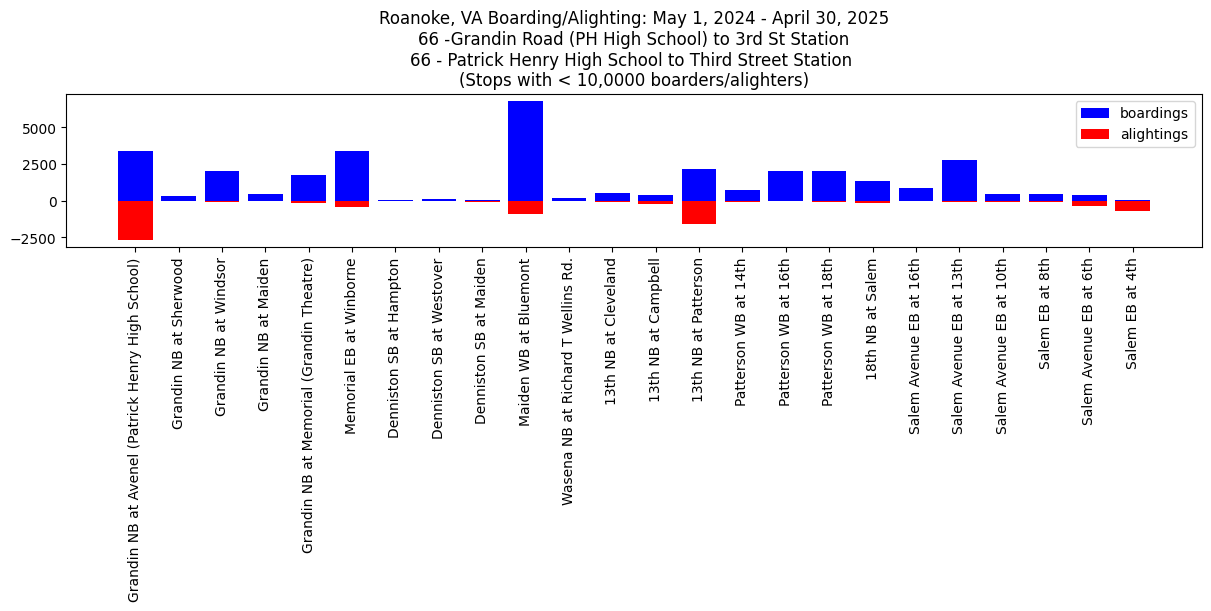

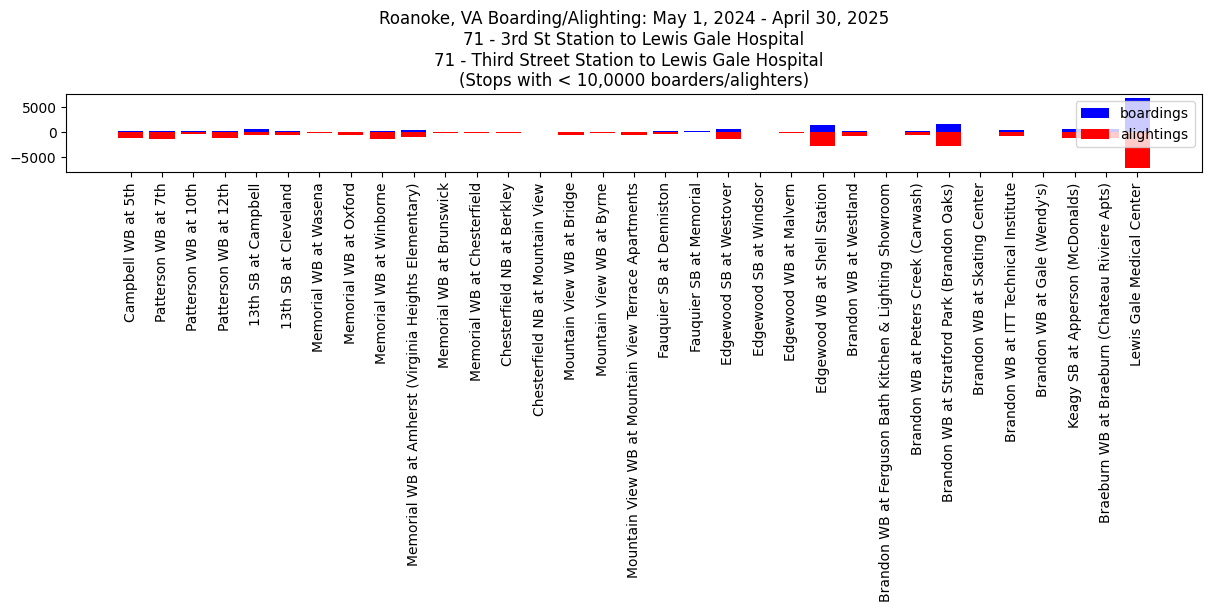

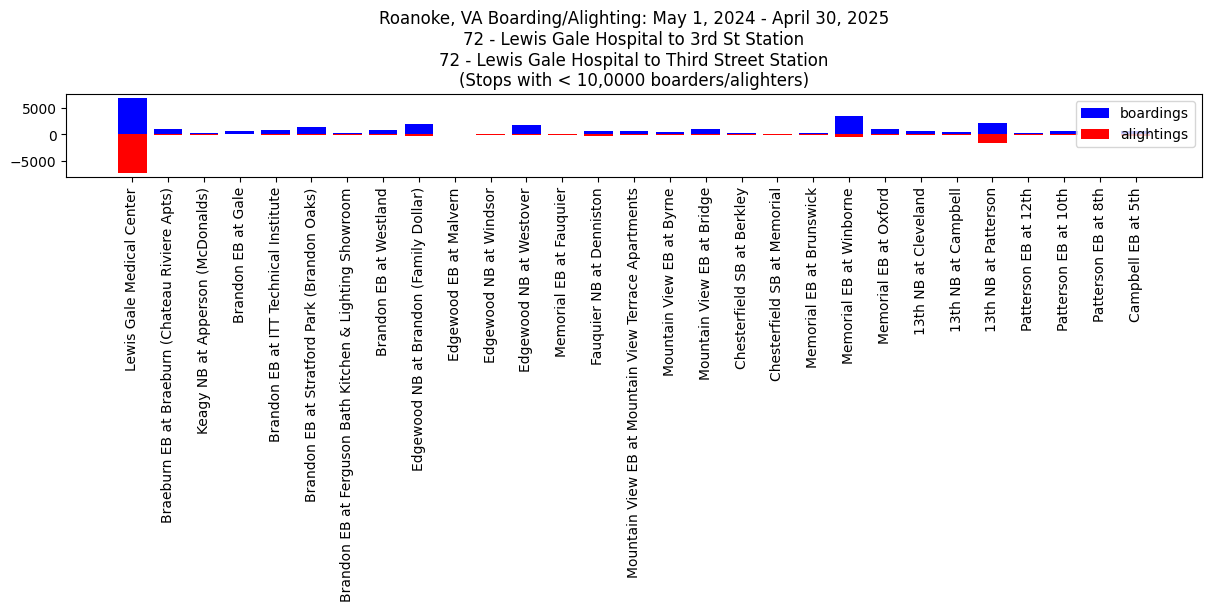

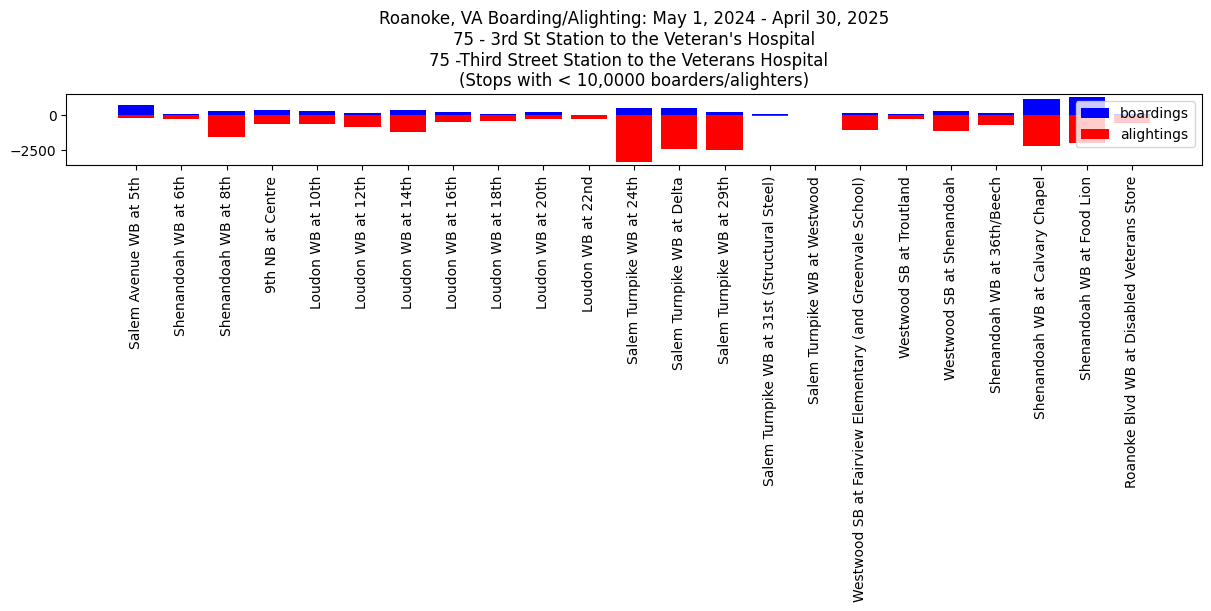

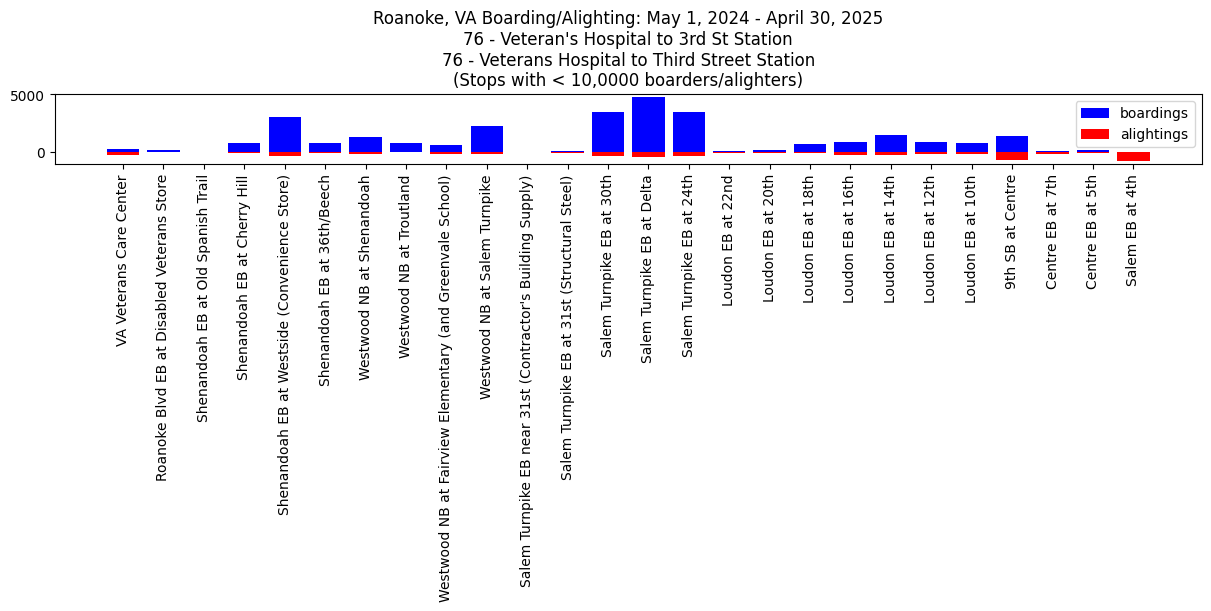

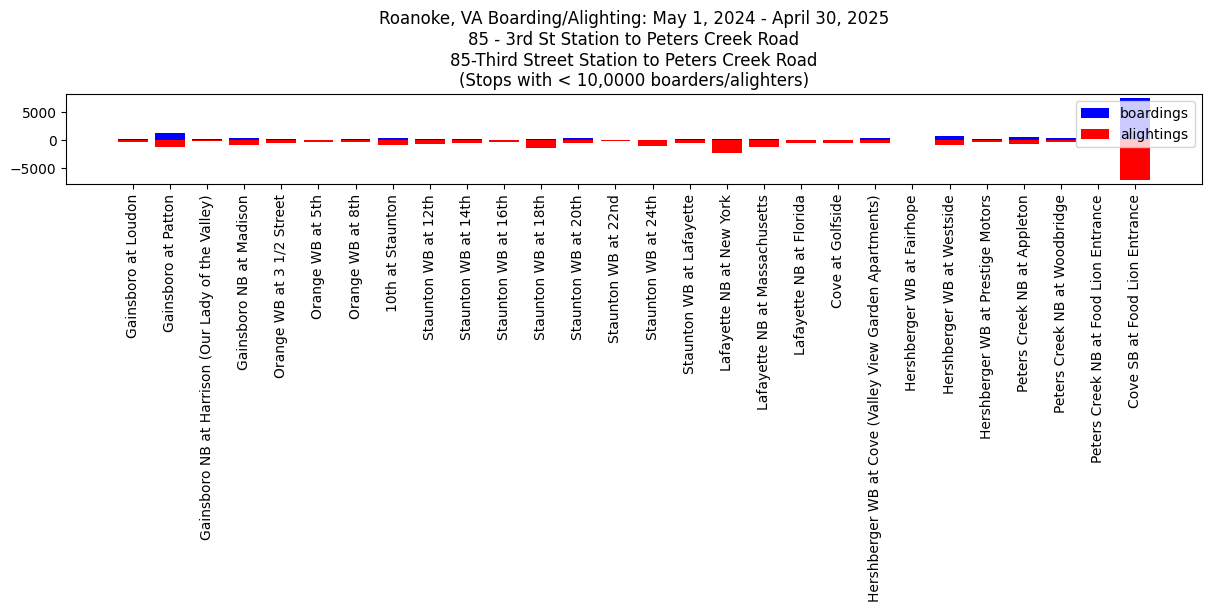

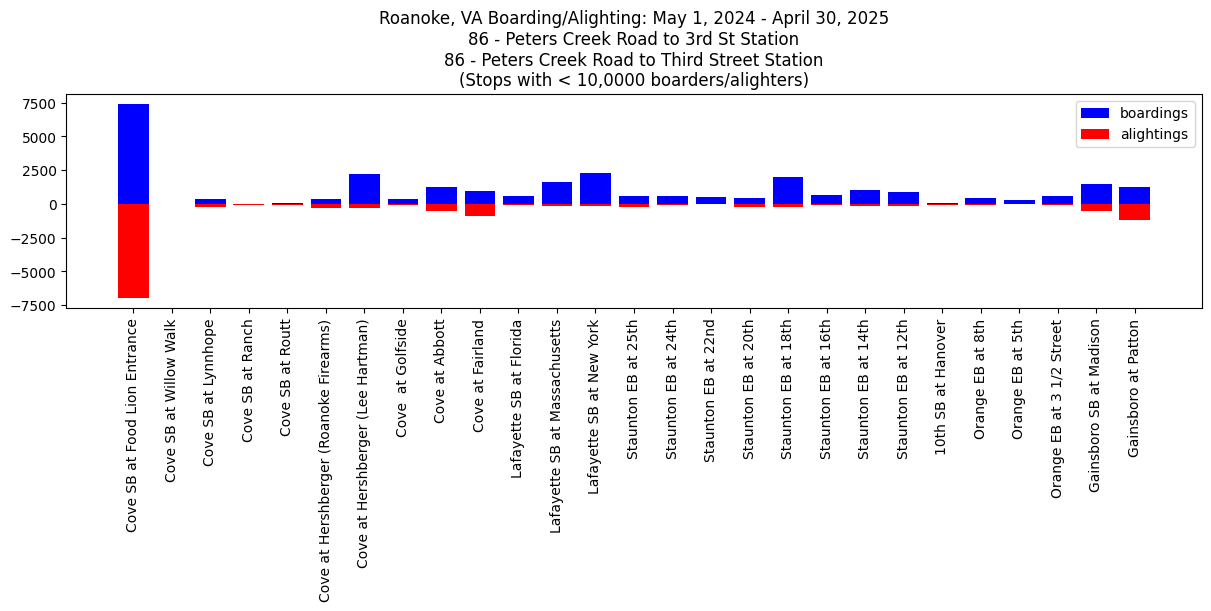

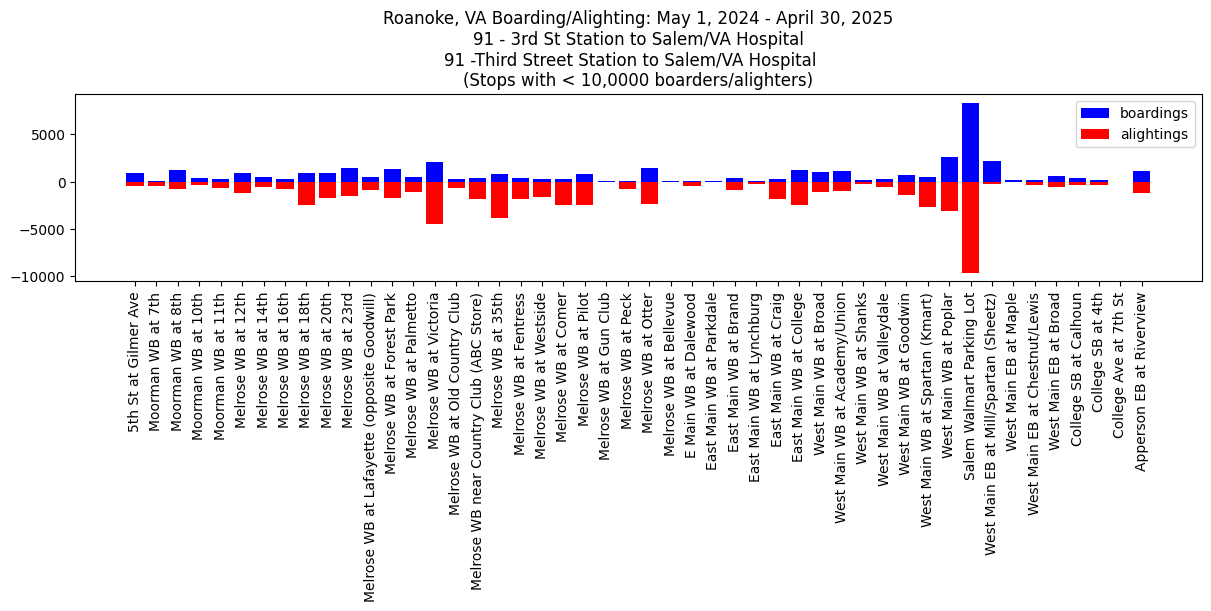

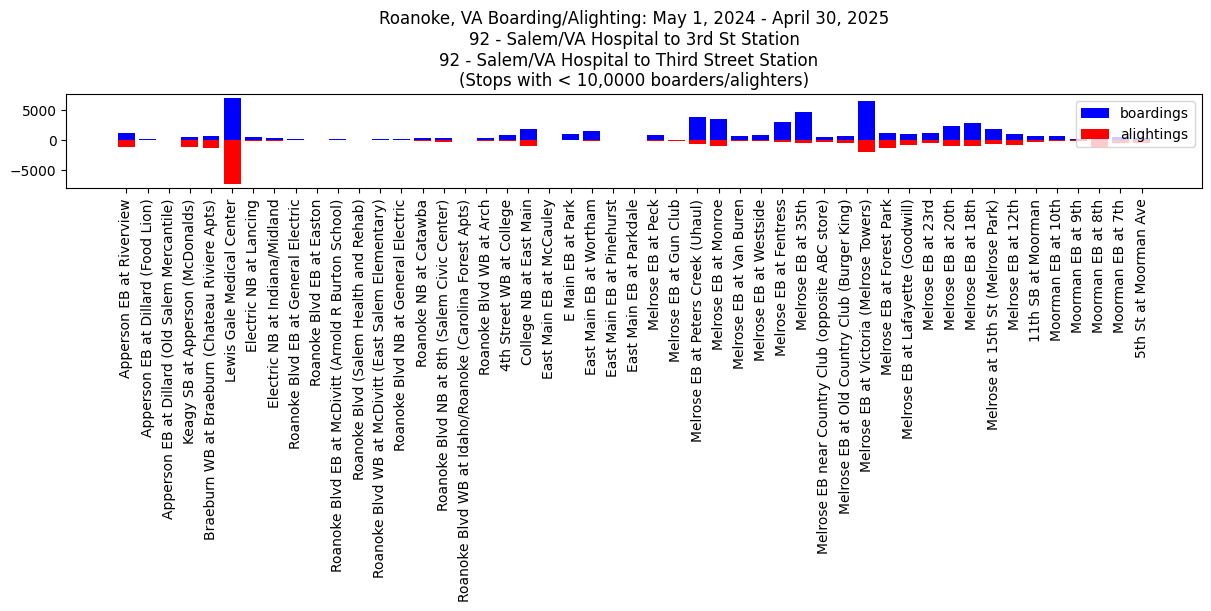

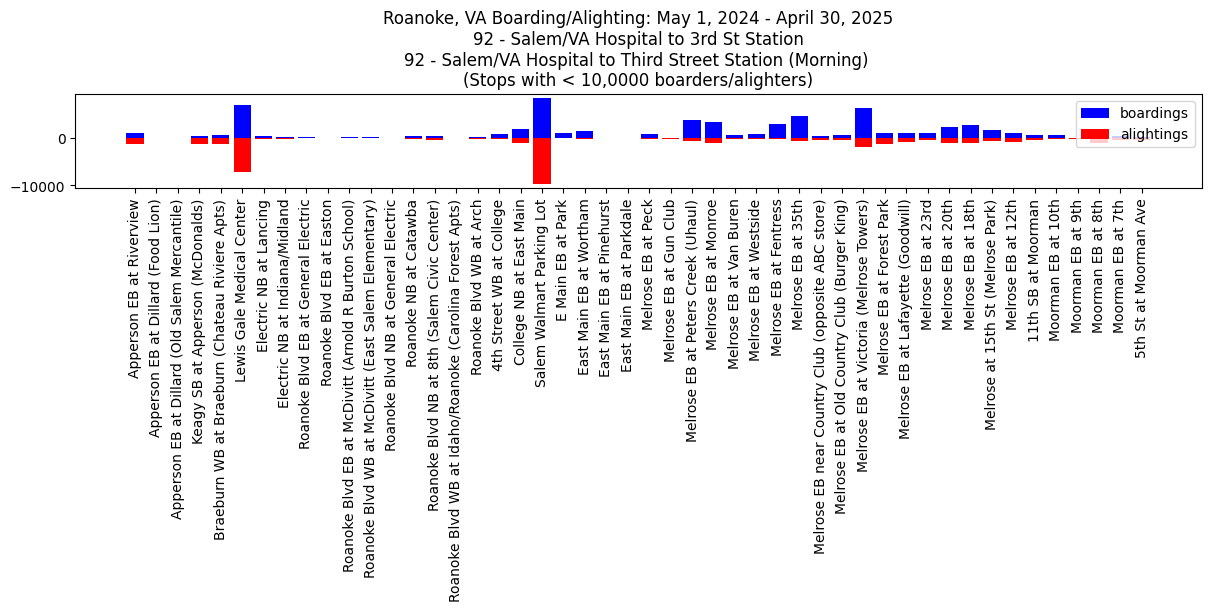

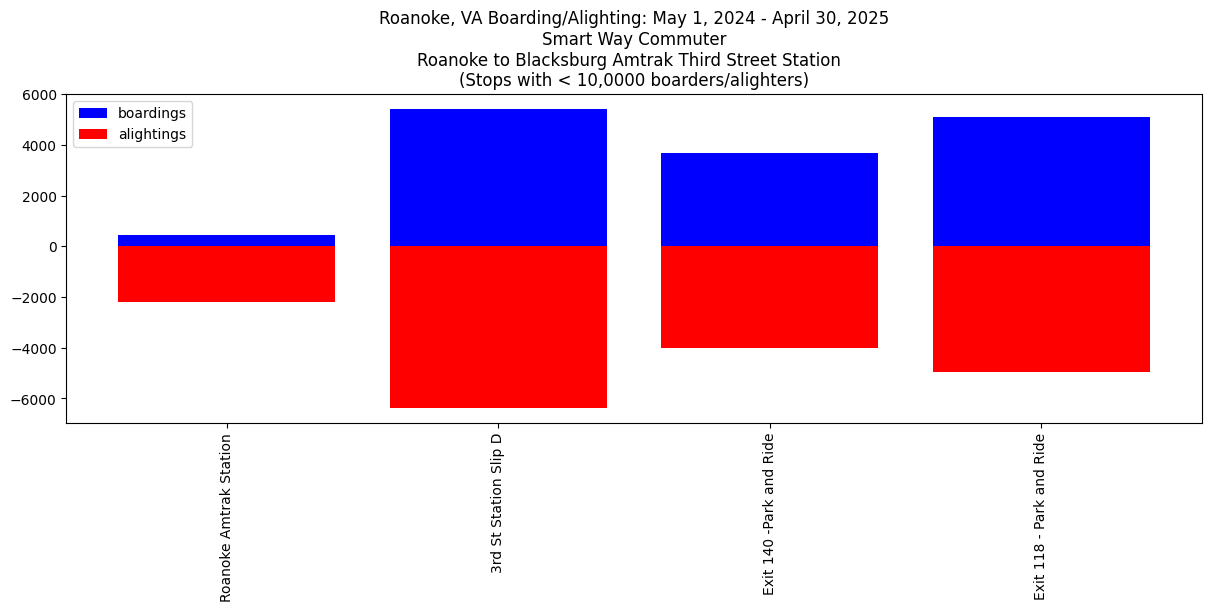

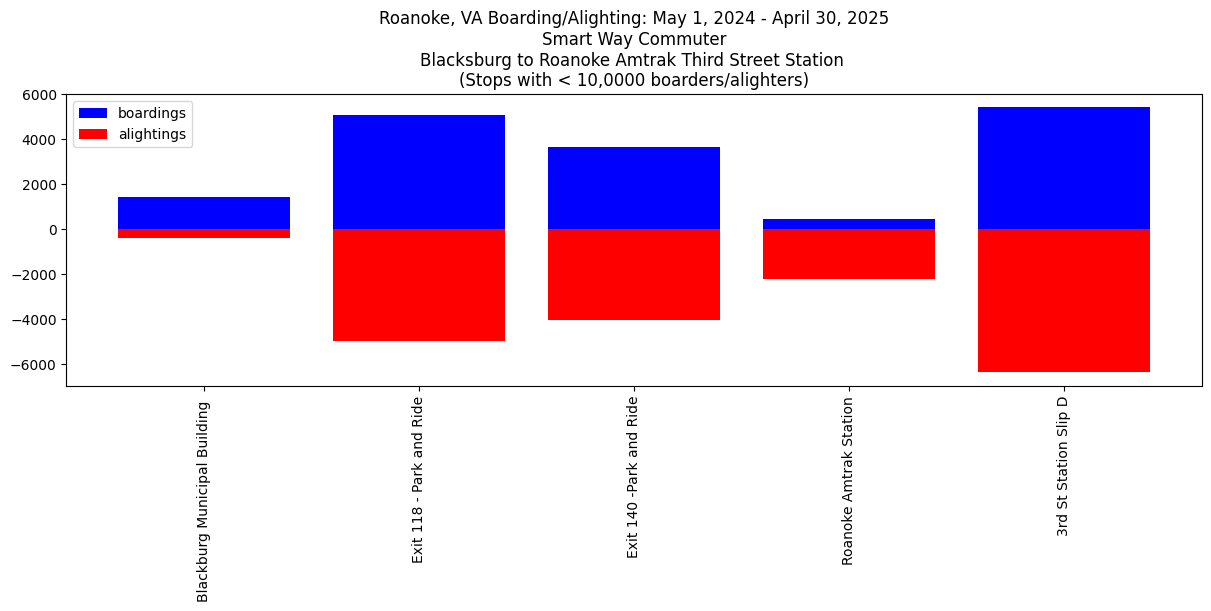

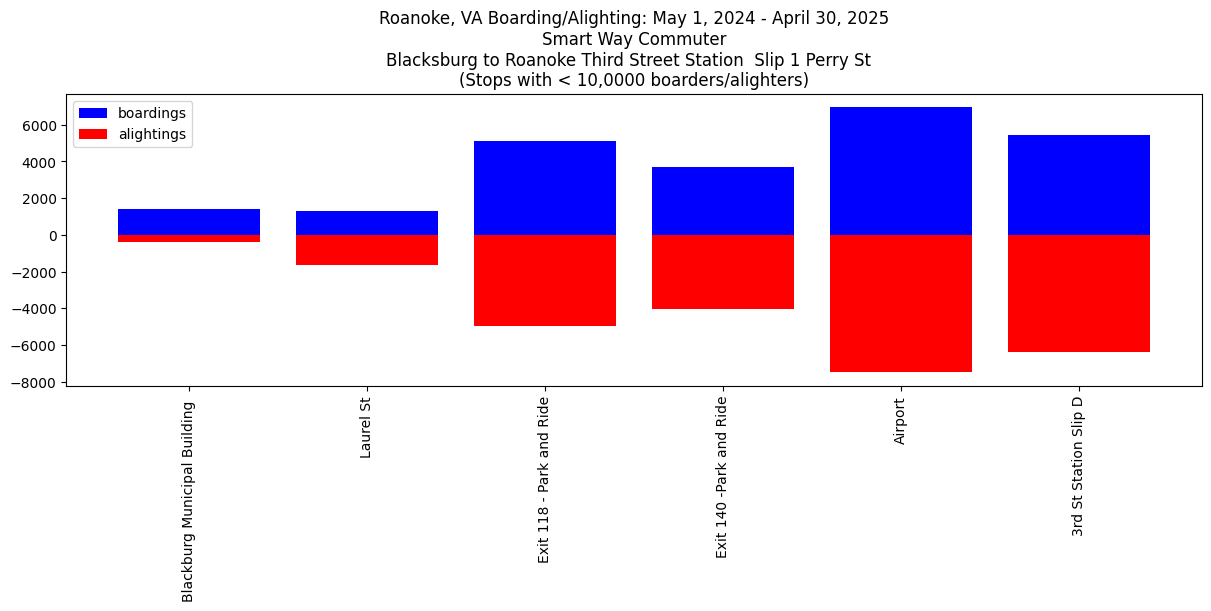

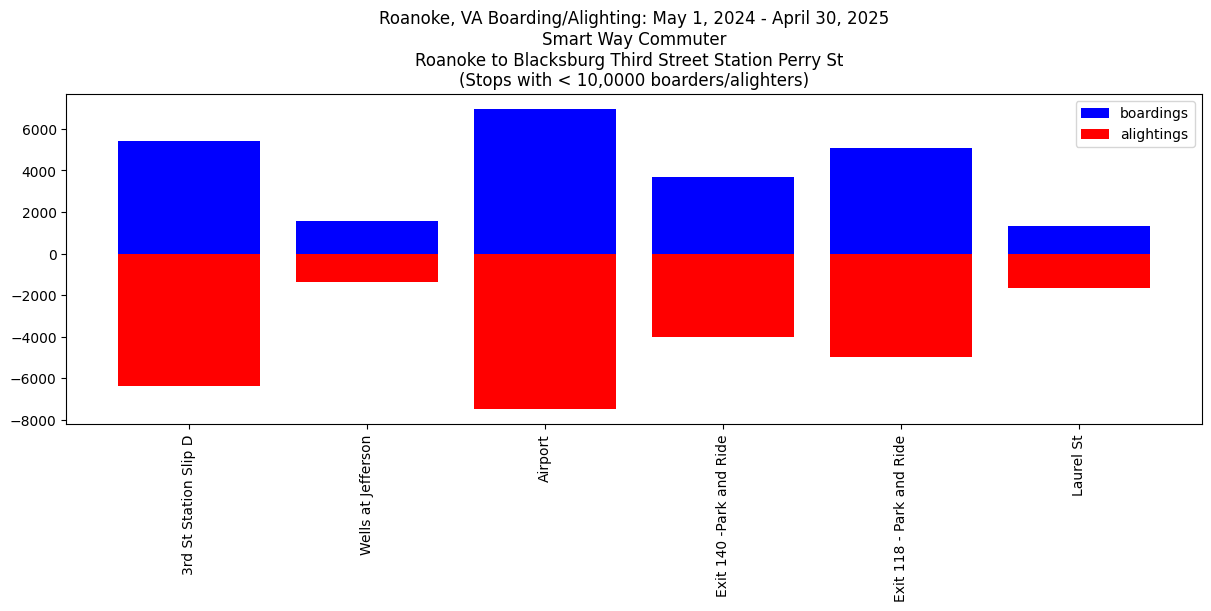

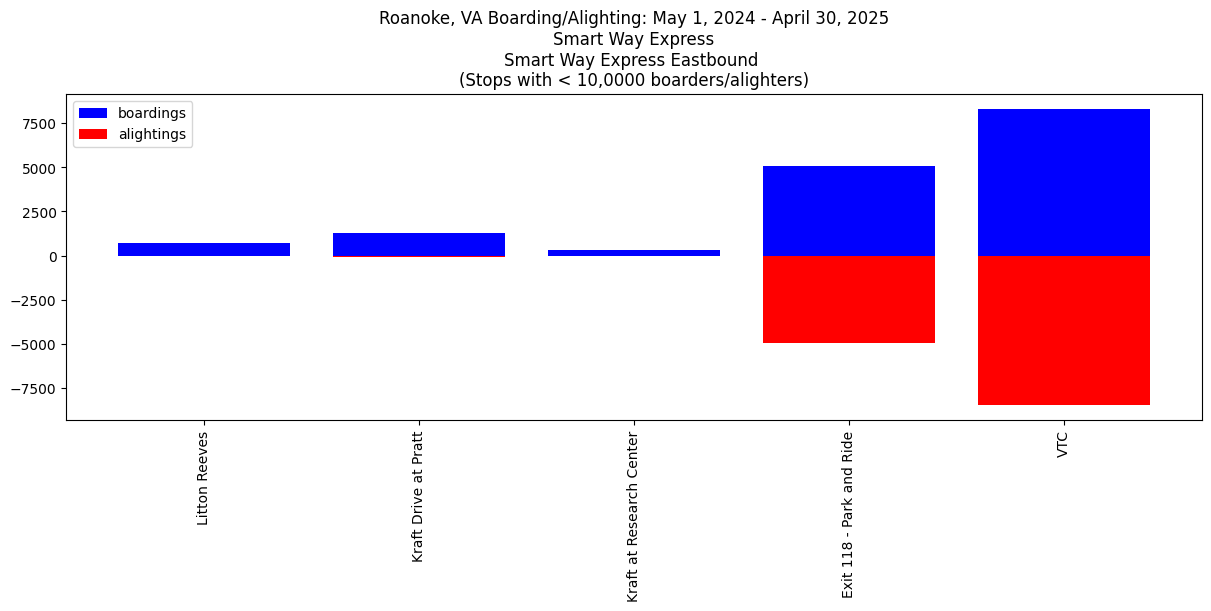

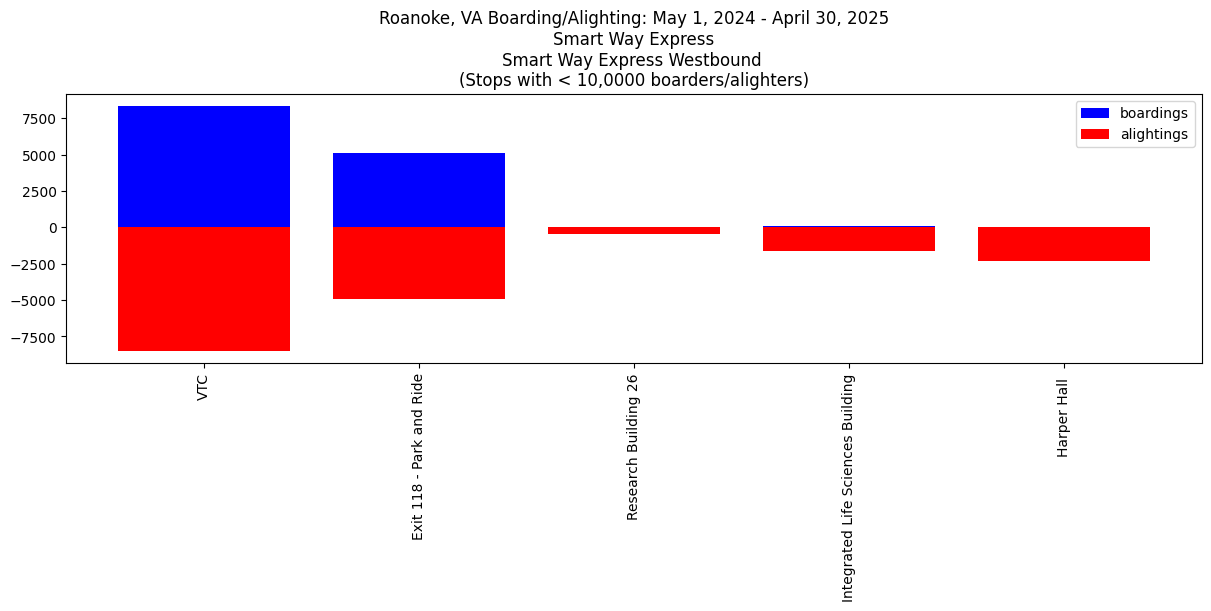

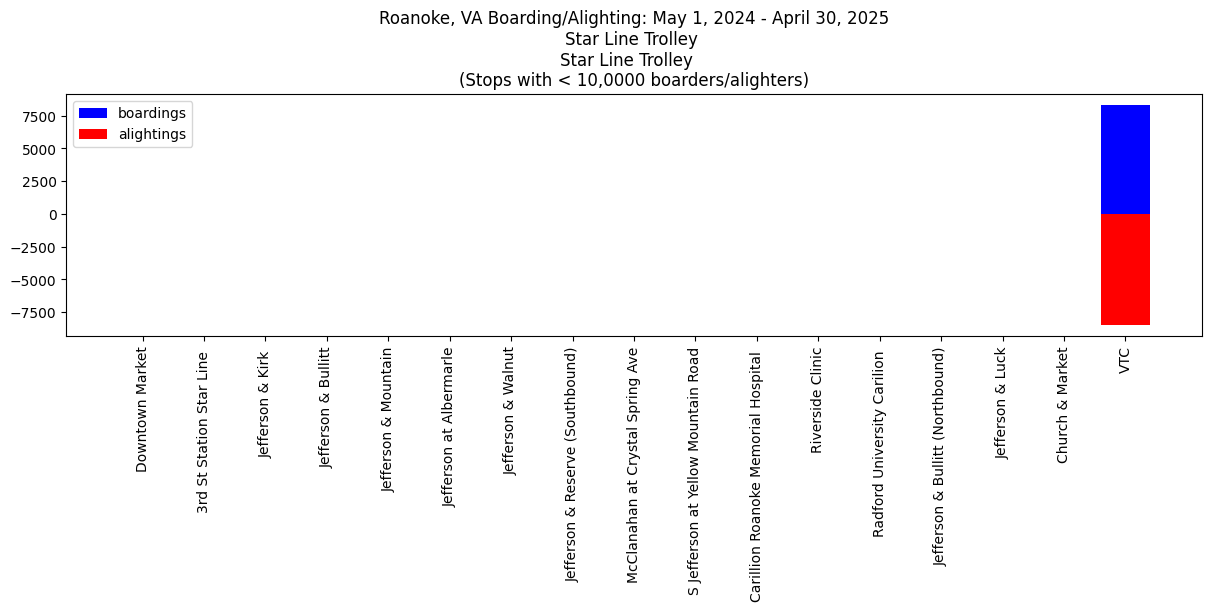

In [16]:
plot_dir = plot_path / 'ridership-less-than-10000'
shutil.rmtree(plot_dir, ignore_errors=True)
plot_dir.mkdir(exist_ok=True)

for index, row in routes_and_directions.iterrows():
    df = df_route_ridership
    df = df[(df['route'] == row['route']) & (df['direction'] == row['direction'])]
    df = df[df['boardings'] < 10000]
    df = df[df['alightings'] < 10000]

    fig, ax = plt.subplots(layout='constrained')
    fig.set_size_inches(12, 6)

    ax.set_title('Roanoke, VA Boarding/Alighting: May 1, 2024 - April 30, 2025\n' + row['route'] + '\n' + row[
        'direction'] + '\n(Stops with < 10,0000 boarders/alighters)')
    ax.bar(df['stop'], df['boardings'], color='blue', label='boardings')
    ax.bar(df['stop'], -df['alightings'], color='red', label='alightings')
    ax.legend(loc="best")

    ax.tick_params(axis='x', labelrotation=90)

    plt.show()
    #plt.savefig(plot_dir / f'{row["route"].strip().replace('/', ' or ')} --- {row["direction"].strip().replace('/', ' or ')}.png')
    plt.close()